In [ ]:
Pkg.clone("https://github.com/arturgower/EffectiveWaves.jl.git")


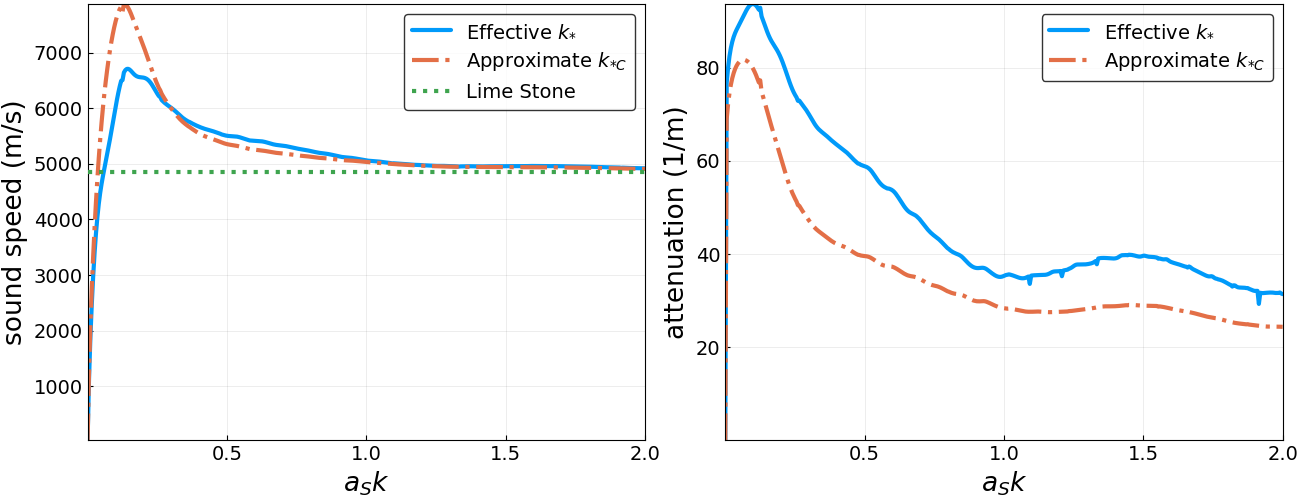

In [4]:
using EffectiveWaves

using LaTeXStrings
using Plots
height=500
# unicodeplots()
 pyplot(linewidth=3, size=(2.6*height,height), border=false)

 Plots.scalefontsizes(1.7)

## choose material

  # concrete
  medium = LimeStone
  inclusion1 = AirDry
  inclusion2 = Brick

  ωfactor = 50.0;
  ωs = 20*ωfactor.*LinRange(real(medium.c/10000),real(medium.c),400) # k from 0 to 1

  volfrac = 0.16
  r1 = 0.1/ωfactor; vol1 = 0.06
  r2 = 1.0/ωfactor; vol2 = volfrac - vol1

  sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = vol1)
  sp2 = Specie(ρ=inclusion2.ρ ,r=r2, c=inclusion2.c, volfrac = volfrac-vol1)

  # True wavenumber
  kTs  = wavenumber_low_volumefraction(ωs, medium, [sp1,sp2]; tol=0.5e-5);
  # Approximate challis
  kTCs = wavenumber_challis(ωs, medium, [sp1,sp2]; basis_order=10);

  kTs_arr = [kTs,kTCs];
  speed_arr = [ ωs./real(ks) for ks in kTs_arr];
  push!(speed_arr, 0 .*ωs + real(medium.c))
  atten_arr = imag.(kTs_arr)

  styles = [:solid :dashdot :dot]
  labs = [L"Effective $k_{*}$" L"Approximate $k_{*C}$" "Lime Stone"]
  ys_arr = speed_arr;
  xs = r1.*(ωs./real(medium.c));
  m =5;
  y1 = min(ys_arr[1][1:m]..., ys_arr[2][1:m]...);
  y2 = max(ys_arr[1][1:m]..., ys_arr[2][1:m]...);
  p1 = plot(xs, ys_arr, xlabel=L"a_S k", ylabel="sound speed (m/s)", labels=labs, line = styles)
        # , ylims = ( min(ys_arr[1]...,ys_arr[3]...,ys_arr[4]...)*0.995,  max(ys_arr[1]...,ys_arr[3]...,ys_arr[4]...)*1.005));

  ys_arr = atten_arr;
  labs = [L"Effective $k_{*}$" L"Approximate $k_{*C}$"]
  p2 = plot(xs, ys_arr, labels=labs, xlabel=L"a_S k", ylabel="attenuation (1/m)", line=styles)
        # , ylims = ( min(ys_arr[1]...,ys_arr[3]...)*0.995,  max(ys_arr[1]...,ys_arr[3]...)*1.005));

  plot(p1,p2)

In [3]:
Plots.scalefontsizes(1/1.7)